In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p scipy,sklearn,numpy

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
CPython 2.7.12
IPython 5.1.0

scipy 0.18.1
sklearn 0.18.1
numpy 1.12.0

compiler   : GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)
system     : Darwin
release    : 16.4.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


Using TensorFlow backend.


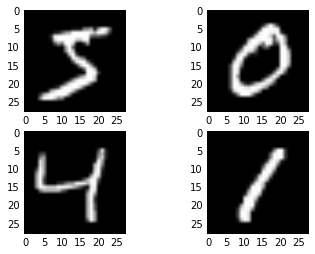

In [2]:
# plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [3]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print X_train.shape, y_train.shape

(60000, 28, 28) (60000,)


In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print y_train.shape

(60000, 10)


In [8]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
# build the model
model = baseline_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)

# final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
3s - loss: 0.2848 - acc: 0.9186 - val_loss: 0.1400 - val_acc: 0.9593
Epoch 2/10
3s - loss: 0.1125 - acc: 0.9674 - val_loss: 0.0943 - val_acc: 0.9717
Epoch 3/10
3s - loss: 0.0728 - acc: 0.9789 - val_loss: 0.0796 - val_acc: 0.9758
Epoch 4/10
3s - loss: 0.0513 - acc: 0.9853 - val_loss: 0.0740 - val_acc: 0.9779
Epoch 5/10
3s - loss: 0.0379 - acc: 0.9893 - val_loss: 0.0687 - val_acc: 0.9784
Epoch 6/10
3s - loss: 0.0271 - acc: 0.9929 - val_loss: 0.0630 - val_acc: 0.9807
Epoch 7/10
3s - loss: 0.0208 - acc: 0.9948 - val_loss: 0.0592 - val_acc: 0.9810
Epoch 8/10
3s - loss: 0.0138 - acc: 0.9972 - val_loss: 0.0596 - val_acc: 0.9812
Epoch 9/10
3s - loss: 0.0111 - acc: 0.9975 - val_loss: 0.0547 - val_acc: 0.9810
Epoch 10/10
3s - loss: 0.0084 - acc: 0.9986 - val_loss: 0.0605 - val_acc: 0.9817
Baseline Error: 1.83%
